In [1]:
import pandas as pd

In [2]:
# read in heirarchal mos
tmpmos = pd.read_csv('mos_daily.csv', header=[0, 1], skipinitialspace=True)
mos = tmpmos.set_index(tmpmos['Unnamed: 0_level_0']['station']).drop('Unnamed: 0_level_0', axis=1).drop('date')

C:\Users\haize\Miniconda3\envs\mos\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [3]:
# set dat as the index and then drop that columns
tmpmos = pd.read_csv('obs_daily.csv', header=[0, 1], skipinitialspace=True)
obs = tmpmos.set_index(tmpmos['Unnamed: 0_level_0']['station']).drop('Unnamed: 0_level_0', axis=1).drop('date')

In [4]:
mos.index.names=['']
obs.index.names=['']
mos.head()

tmpq                        wdrq                        wspq  \
                 KJFK       KLGA KNYC        KJFK        KLGA KNYC       KJFK   
                                                                                
2000-05-30  61.000000  62.500000  NaN   95.000000   90.000000  NaN  14.500000   
2000-05-31  58.687500  61.062500  NaN  110.000000  113.125000  NaN   7.375000   
2000-06-01  63.791667  67.666667  NaN  140.000000  186.250000  NaN   2.875000   
2000-06-02  70.058824  73.352941  NaN  168.235294  212.941176  NaN   4.647059   
2000-06-03  73.166667  73.833333  NaN  315.000000  330.000000  NaN  14.500000   

                           prpq            
                 KLGA KNYC KJFK KLGA KNYC  
                                           
2000-05-30  14.000000  NaN  NaN  NaN  NaN  
2000-05-31   7.187500  NaN  NaN  NaN  NaN  
2000-06-01   2.416667  NaN  NaN  NaN  NaN  
2000-06-02   4.823529  NaN  NaN  NaN  NaN  
2000-06-03  12.833333  NaN  NaN  NaN  NaN

In [5]:
obs.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01',
       '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06'],
      dtype='object', name='', length=6762)

In [6]:
shared_index = mos.index.intersection(obs.index)
shared_index

Index(['2000-05-30', '2000-05-31', '2000-06-01', '2000-06-02', '2000-06-03',
       '2000-06-04', '2000-06-05', '2000-06-06', '2000-06-07', '2000-06-08',
       ...
       '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01',
       '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06'],
      dtype='object', name='', length=6592)

In [7]:
mos_t = mos.loc[shared_index]

In [8]:
obs_t = obs.loc[shared_index]

In [9]:
obs_t.index = pd.to_datetime(obs_t.index)
mos_t.index = pd.to_datetime(mos_t.index)

In [10]:
obs_i = obs_t.interpolate('time')
mos_i = mos_t.interpolate('time')

In [11]:
obs_s = obs_i.swaplevel(axis=1)
mos_s = mos_i.swaplevel(axis=1)

In [12]:
def make_fv(data):
    dfs = []
    for j in ['KJFK', 'KLGA', 'KNYC']:
        df = data[j].copy()
        df['station'] = j
        dfs.append(df)
    return pd.concat(dfs)

In [13]:
ofv = make_fv(obs_s)
mfv = make_fv(mos_s)

In [14]:
from sklearn import manifold

In [15]:
isoo = manifold.Isomap(10)

In [16]:
isoo.fit(ofv[['tmpq', 'prpq', 'wspq', 'wdrq']])

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=10, neighbors_algorithm='auto', path_method='auto', tol=0)

In [17]:
yo = isoo.transform(ofv[['tmpq', 'prpq', 'wspq', 'wdrq']])

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
def season(month):
    if month in [12,1,2]:
        return "Winter"
    if month in [3,4,5]:
        return "Spring"
    if month in [6,7,8]:
        return "Summer"     
    if month in [9,10,11]:
        return "Fall"

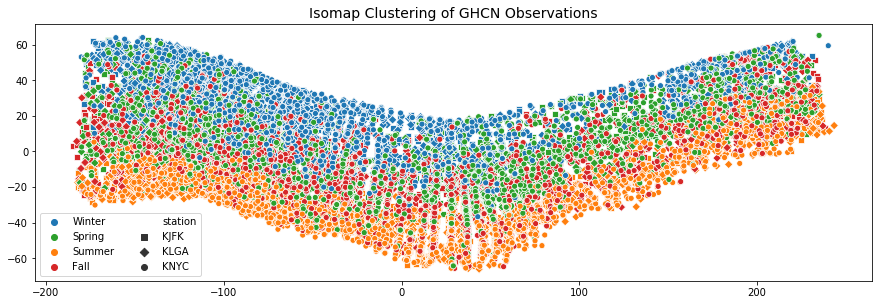

In [20]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.scatterplot(x=yo[:,0], y=yo[:,1], hue = ofv.index.month.map(season), 
                     hue_order=['Winter', 'Spring', 'Summer', 'Fall' ],
                     palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red'],
                     style=ofv['station'], markers=['s', 'D', 'o']
                    )
_ = ax.legend(ncol=2)
_ = ax.set_title("Isomap Clustering of GHCN Observations", fontsize=14)
_ = ax.set_aspect("equal")
fig.savefig("ghcn_isomap.png", bbox_inches='tight')

In [21]:
isom = manifold.Isomap(10)

In [22]:
mfv['prpq'] = mfv['prpq'].fillna(0)
mfv = mfv.interpolate('time')

In [ ]:
isom.fit(mfv[['tmpq', 'prpq', 'wspq', 'wdrq']])

In [ ]:
ym = isom.transform(mfv[['tmpq', 'prpq', 'wspq', 'wdrq']])

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.scatterplot(x=ym[:,0], y=ym[:,1], hue = mfv.index.month.map(season), 
                     hue_order=['Winter', 'Spring', 'Summer', 'Fall' ],
                     palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red'],
                     style=mfv['station'], markers=['s', 'D', 'o']
                    )
_ = ax.legend(ncol=2)
_ = ax.set_title("Isomap Clustering of MOS Guidance", fontsize=14)
_ = ax.set_aspect('equal')
fig.savefig("mos_isomap.png", bbox_inches='tight')

In [ ]:
mfv['wsmq'] = mfv['wspq'] * (1609.93/3600)
ofv['wsmq'] = mfv['wspq']/10

In [ ]:
bias = mfv[['tmpq', 'prpq', 'wsmq', 'wdrq']] - ofv[['tmpq', 'prpq', 'wsmq', 'wdrq']] 
bias['station'] = mfv['station']

In [ ]:
isob = manifold.Isomap()

In [ ]:
isob.fit(bias[['tmpq', 'prpq', 'wsmq', 'wdrq']])

In [ ]:
yb = isob.transform(bias[['tmpq', 'prpq', 'wsmq', 'wdrq']])

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.scatterplot(x=yb[:,0], y=yb[:,1], 
                     hue = bias.index.month.map(season), 
                     hue_order=['Winter', 'Spring', 'Summer', 'Fall' ],
                     palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red'],
                     style=mfv['station'], markers=['s', 'D', 'o']
                    )
_ = ax.legend(ncol=2)
_ = ax.set_title("Isomap Clustering of Forecasting Bias")
fig.savefig("bias_isomap.png", bbox_inches='tight')